# Downloading and Prepping Data

Import Primary Modules. The first thing we'll do is import two key data analysis modules: `pandas` and `numpy`.

In [6]:
import pandas as pd
import numpy as np

Mengambil data pilpres dan membacanya di *pandas* dataframe.


In [7]:
df = pd.read_excel("https://github.com/daffa1134/Praktikum-VisDat/blob/main/dataPilpres.xlsx?raw=true", sheet_name='Sheet1')
print("Data berhasil dibaca!")

Data berhasil dibaca!


Melihat 5 data teratas!!

In [8]:
df.head()

,NAMA_PROV,NAMA_KAB/KOTA,NOMOR 01,NOMOR 02
0,ACEH,ACEH SELATAN,3267680,31334160
1,ACEH,ACEH TENGGARA,13105015,35300265
2,ACEH,ACEH TIMUR,10984869,91387359
3,ACEH,ACEH TENGAH,14001880,21683385
4,ACEH,ACEH BARAT,5079183,31261548


Melihat banyaknya entri pada dataset

In [9]:
print(df.shape)

(514, 4)


Memodifikasi dataset untuk mempermudah dalam memvisualisasikan

#### 1. Menghapus kolom yang tidak perlu.

In [10]:
df.drop(['NAMA_PROV'], axis = 1, inplace = True)

#### 2. Mengganti nama beberapa kolom.

In [11]:
df.rename(columns={'NAMA_KAB/KOTA':'Kabupaten', 'NOMOR 01':'Nomor 1', 'NOMOR 02':'Nomor 2'}, inplace = True)

In [12]:
df.head()

,Kabupaten,Nomor 1,Nomor 2
0,ACEH SELATAN,3267680,31334160
1,ACEH TENGGARA,13105015,35300265
2,ACEH TIMUR,10984869,91387359
3,ACEH TENGAH,14001880,21683385
4,ACEH BARAT,5079183,31261548


#### 3. Memastikan semua kolom bertipe string.

In [13]:
all(isinstance(column, str) for column in df.columns)

True

#### 4. Menjadikan kabupaten sebagai index

In [14]:
df.set_index('Kabupaten', inplace = True)

In [15]:
# optional: to remove the name of the index
df.index.name = None

In [16]:
df.head()

,Nomor 1,Nomor 2
ACEH SELATAN,3267680,31334160
ACEH TENGGARA,13105015,35300265
ACEH TIMUR,10984869,91387359
ACEH TENGAH,14001880,21683385
ACEH BARAT,5079183,31261548


#### 5. Menambah kolom total.

In [17]:
df['Total'] = df.sum(axis=1)

df.head()

,Nomor 1,Nomor 2,Total
ACEH SELATAN,3267680,31334160,34601840
ACEH TENGGARA,13105015,35300265,48405280
ACEH TIMUR,10984869,91387359,102372228
ACEH TENGAH,14001880,21683385,35685265
ACEH BARAT,5079183,31261548,36340731


Mengecek berapa banyak objek null di dataset

In [18]:
df.isnull().sum()

Nomor 1    0
Nomor 2    0
Total      0
dtype: int64

Sekarang dataset memiliki kolom baru, yaitu kolom total yang menjumlahkan orang yang memilih Nomor 1 dan Nomor 2. Jadi jika kita print dimensi data, kita akan mendapatkan:


In [19]:
print('data dimensions:', df.shape)

data dimensions: (514, 3)


# Visualizing Data using Matplotlib

Import the `matplotlib` library.

In [20]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


# Area Plots

Mengurutkan data 5 teratas berdasarkan total suara dari yang paling banyak

In [21]:
df.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

In [22]:
df_low5 = df.tail()
#Mengambil data dari Nomor 1 dan Nomor 2 saja
data = ['Nomor 1', 'Nomor 2']
# Mendapatkan 5 data terbawah berdasarkan urutan total
df_low5 = df_low5[data]

df_low5.head()

,Nomor 1,Nomor 2
KOTA PADANG PANJANG,63888,442320
SUPIORI,465842,28082
TANA TIDUNG,280768,144384
KOTA SABANG,49158,345114
KEPULAUAN SERIBU,52956,49686


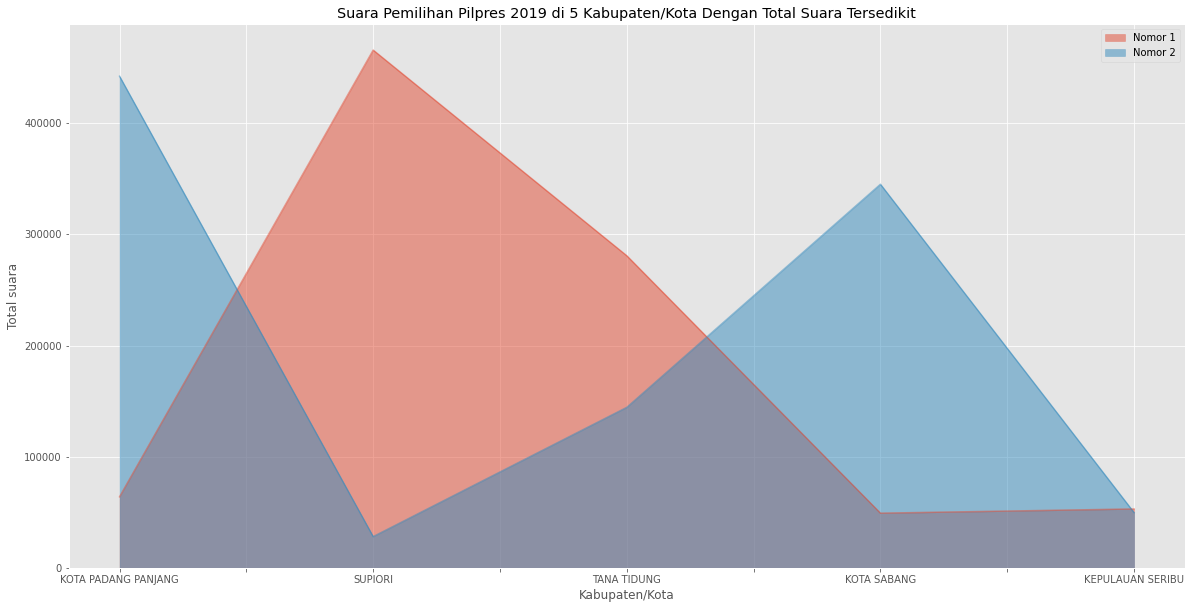

In [23]:
df_low5.plot(kind = 'area', stacked = False, figsize=(20,10))

plt.title('Suara Pemilihan Pilpres 2019 di 5 Kabupaten/Kota Dengan Total Suara Tersedikit')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Total suara')

plt.show()

Nilai transparasi awal pada unstacked plot adalah (nilai alpha) 0.5. Kita bisa memodifikasinya dengan parameter `alpha`.


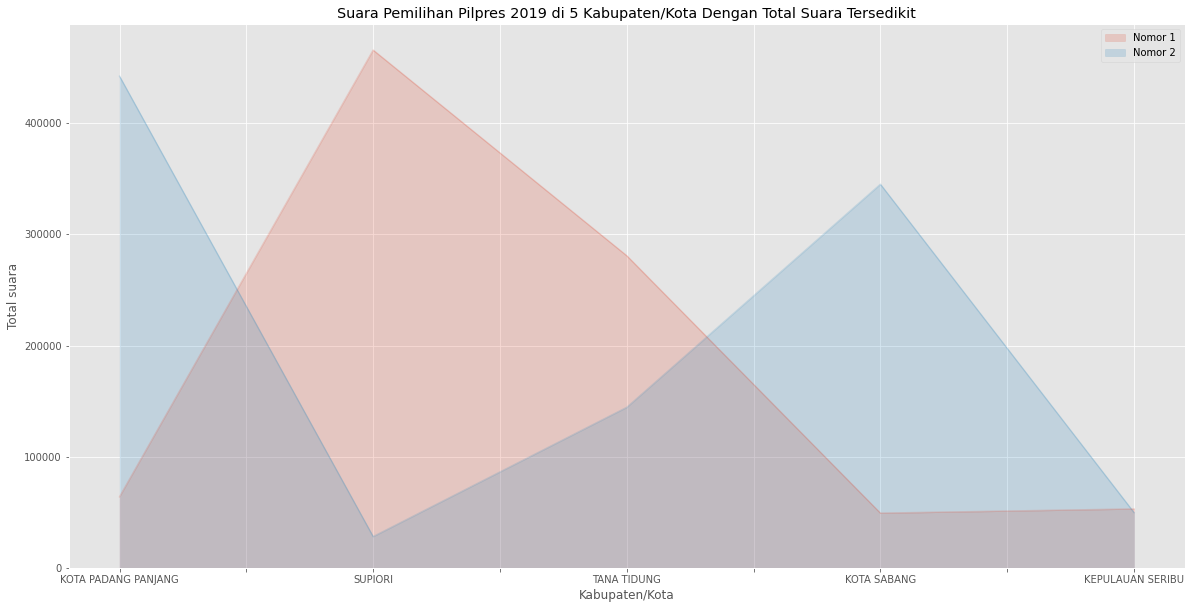

In [24]:
df_low5.plot(kind = 'area', alpha = 0.2,stacked = False, figsize=(20,10))

plt.title('Suara Pemilihan Pilpres 2019 di 5 Kabupaten/Kota Dengan Total Suara Tersedikit')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Total suara')

plt.show()

# Histograms

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [25]:
df_low5[data].head()

,Nomor 1,Nomor 2
KOTA PADANG PANJANG,63888,442320
SUPIORI,465842,28082
TANA TIDUNG,280768,144384
KOTA SABANG,49158,345114
KEPULAUAN SERIBU,52956,49686


In [26]:
# Mendapatkan 10 data terbawah berdasarkan urutan total
df_low10 = df.tail(10)

# np.histogram returns 2 values
count, bin_edges = np.histogram(df_low10['Nomor 1'].tail(10))

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[4 0 0 1 0 1 2 0 1 1]
[ 49158.  124472.2 199786.4 275100.6 350414.8 425729.  501043.2 576357.4
 651671.6 726985.8 802300. ]


We can easily graph this distribution by passing `kind=hist` to `plot()`.

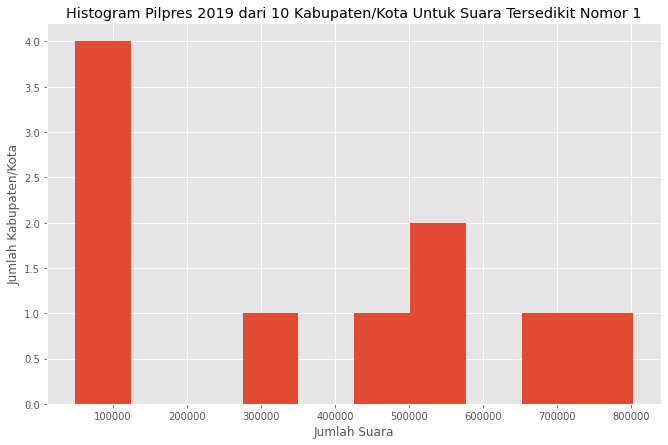

In [27]:
df_low10['Nomor 1'].plot(kind='hist', figsize=(11, 7))

# add a title to the histogram
plt.title('Histogram Pilpres 2019 dari 10 Kabupaten/Kota Untuk Suara Tersedikit Nomor 1')
# add y-label
plt.ylabel('Jumlah Kabupaten/Kota')
# add x-label
plt.xlabel('Jumlah Suara')

plt.show()

Berdasarkan plot di atas, sumbu-x merepresentasikan jumlah suara pada Nomor 1 dari interval 49158. Sumbu-x merupakan jumlah kabupaten/kota yang berpartisipasi dalam range.

Perhatikan label sumbu-x tidak sama dengan ukuran bin. Kita dapat memperbaikinya dengan menambah keyword `xticks` seperti berikut:

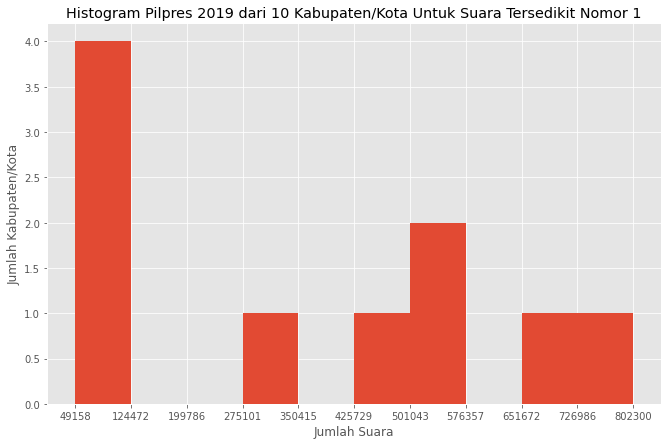

In [28]:
df_low10['Nomor 1'].plot(kind='hist', figsize=(11, 7), xticks = bin_edges)

# add a title to the histogram
plt.title('Histogram Pilpres 2019 dari 10 Kabupaten/Kota Untuk Suara Tersedikit Nomor 1')
# add y-label
plt.ylabel('Jumlah Kabupaten/Kota')
# add x-label
plt.xlabel('Jumlah Suara')

plt.show()

Kita juga bisa memplotkan beberapa histogram pada plot yang sama. Sebagai contoh, kita akan memplotkan histogram untuk data Pidie dan Kota Sabang.

In [29]:
index = ['PIDIE', 'KOTA SABANG', 'SUPIORI']
df_multi = df.loc[index, data]

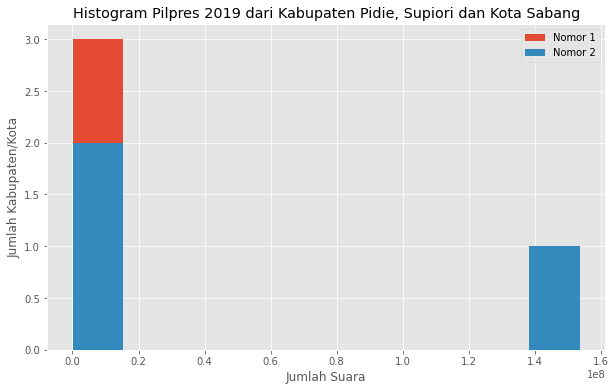

In [30]:
# generate histogram
df_multi.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram Pilpres 2019 dari Kabupaten Pidie, Supiori dan Kota Sabang')
plt.ylabel('Jumlah Kabupaten/Kota')
plt.xlabel('Jumlah Suara')

plt.show()

Melakukan sedikit modifikasi terhadap plot di atas:

*   Menaikkan ukuran bin menjadi 15 dengan parameter `bins`;
*   Mengubah transparasi menjadi 60% dengan parameter `alpha`;
*   Memberi label sumbu-x dengan parameter `x-label`;
*   Mengubah warna plot dengan parameter `color`.

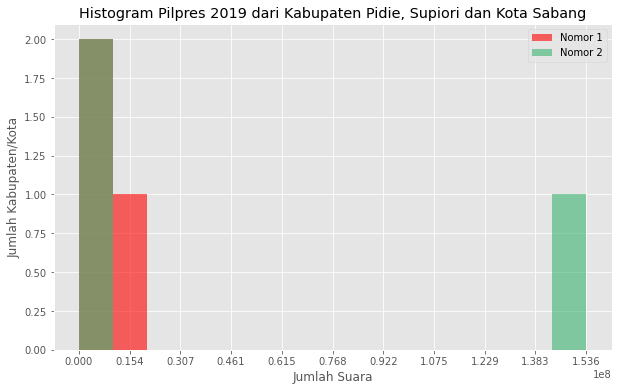

In [31]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_multi)

# un-stacked histogram
df_multi.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha = 0.6,
          xticks=bin_edges,
          color=['red', 'mediumseagreen']
         )

plt.title('Histogram Pilpres 2019 dari Kabupaten Pidie, Supiori dan Kota Sabang')
plt.ylabel('Jumlah Kabupaten/Kota')
plt.xlabel('Jumlah Suara')

plt.show()

# Bar Charts (Dataframe)

Pada bar chart ini, akan dibandingkan hasil pemnungutan suara pada Kabupaten Pidie

In [32]:
# step 1: get the data
df_pidie = df.loc['PIDIE', data]
df_pidie.head()

Nomor 1     12959690
Nomor 2    153618280
Name: PIDIE, dtype: int64

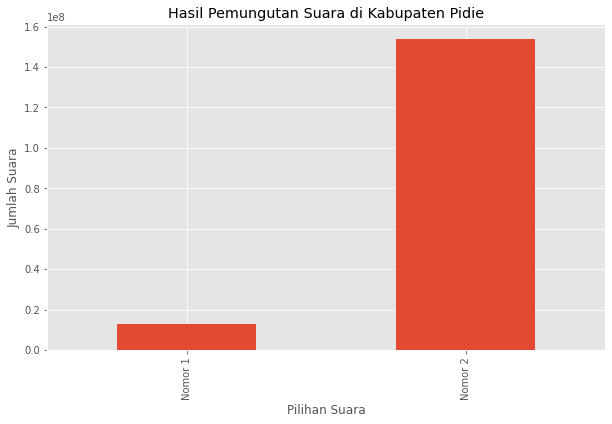

In [33]:
# step 2: plot data
df_pidie.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Pilihan Suara') # add to x-label to the plot
plt.ylabel('Jumlah Suara') # add y-label to the plot
plt.title('Hasil Pemungutan Suara di Kabupaten Pidie') # add title to the plot

plt.show()

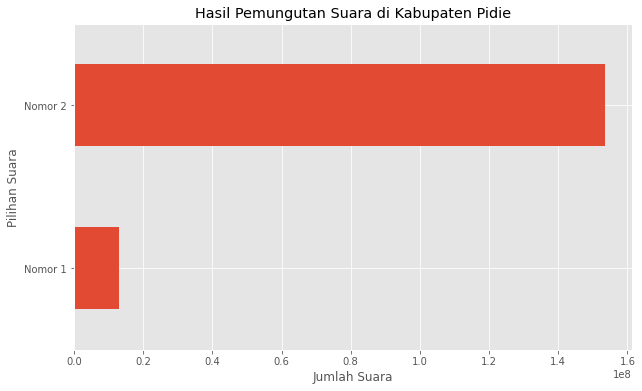

In [34]:
# Menggunakan Horizontal Bar Plot
df_pidie.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Jumlah Suara') # add x-label to the plot
plt.ylabel('Pilihan Suara') # add to y-label to the plot
plt.title('Hasil Pemungutan Suara di Kabupaten Pidie') # add title to the plot

plt.show()